---
## Task 1: IMPLEMENT LINEAR REGRESSION (CO2_Emission_Canada)
## _Author: SANDHYA S_
### _Problem Statement:_
#### * _Predict Co2_Emission(g/km) based on engine size (L)_
#### * _This is a simple linear regression task as it involves just 2 variables._
#### * _Perform train test evaluation on given data ( EngineSize(L) vs CO2 Emission (g/km))_
### _Dataset: https://bit.ly/3qK7itO_
---

## _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## _Loading Data_

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Selecting the columns - Engine Size and CO2 Emissions
data = df.loc[:, ['Engine Size(L)', 'CO2 Emissions(g/km)']]
data = data.rename(columns = {'Engine Size(L)': 'Engine_Size', 'CO2 Emissions(g/km)': 'CO2_Emissions'})

## _Data Exploration_

In [4]:
# Checking for Null Values
data.isna().sum()

Engine_Size      0
CO2_Emissions    0
dtype: int64

In [5]:
# Displaying first 20 values in the dataset
data.head(20)

,Engine_Size,CO2_Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
9,2.4,212


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Engine_Size    7385 non-null   float64
 1   CO2_Emissions  7385 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 115.5 KB


In [7]:
# Structure of Data
data.shape

(7385, 2)

In [8]:
# Statistics of Data
data.describe()

,Engine_Size,CO2_Emissions
count,7385.000000,7385.000000
mean,3.160068,250.584699
std,1.354170,58.512679
min,0.900000,96.000000
25%,2.000000,208.000000
50%,3.000000,246.000000
75%,3.700000,288.000000
max,8.400000,522.000000


## _Data Visualization_

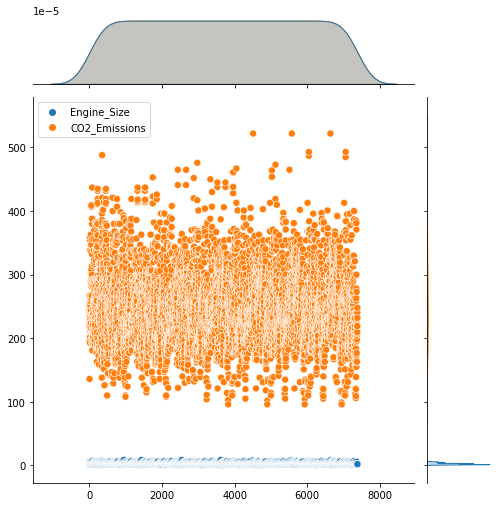

In [9]:
# Plotting Distribution of Data
sns.jointplot(data=data, s=50, height=7)
plt.show()

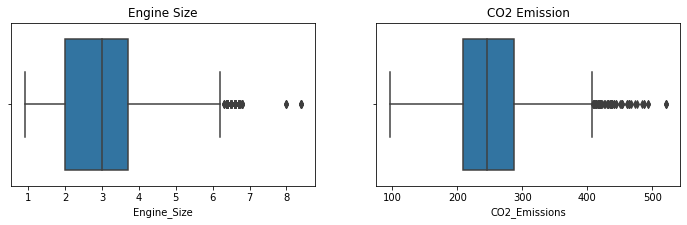

In [10]:
# Boxplot for Engine Size & CO2 Emission
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data.Engine_Size)
plt.title('Engine Size')
plt.subplot(1, 2, 2)
sns.boxplot(data.CO2_Emissions)
plt.title('CO2 Emission')
plt.show()

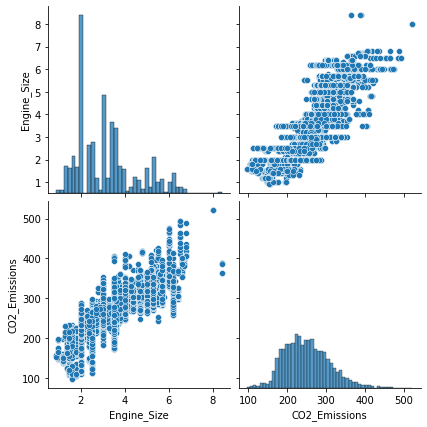

In [11]:
sns.pairplot(data=data, height=3)
plt.show()

In [12]:
# Correlation between Variables
data.corr()

,Engine_Size,CO2_Emissions
Engine_Size,1.000000,0.851145
CO2_Emissions,0.851145,1.000000


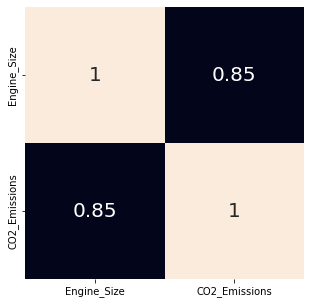

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'fontsize':20})
plt.show()

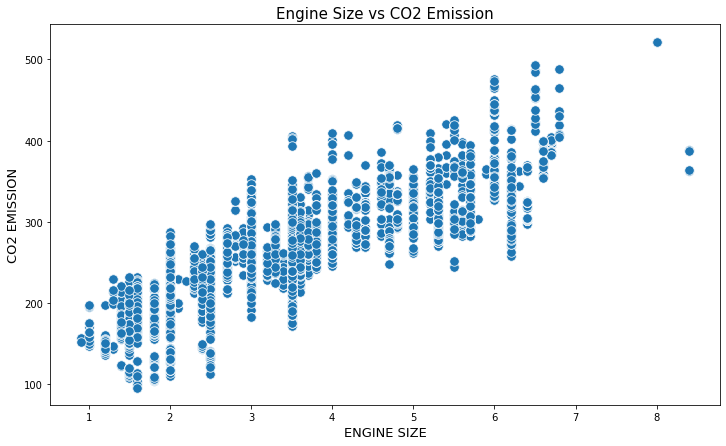

In [14]:
# Scatterplot - Engine Size vs CO2 Emission
plt.figure(figsize=(12, 7))
plt.title('Engine Size vs CO2 Emission', fontsize=15)
plt.xlabel('ENGINE SIZE', fontsize=13)
plt.ylabel('CO2 EMISSION', fontsize=13)
sns.scatterplot(data.Engine_Size, data.CO2_Emissions, s=90)
plt.show()

# _SIMPLE LINEAR REGRESSION_

## _Importing Libraries_

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## _Creating Training & Testing Set_

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (7385, 1)
y: (7385,)


In [17]:
# Spliting dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
# Structure of each set in Train & Test data
col = ['X_train', 'X_test', 'y_train', 'y_test']
tset = [X_train, X_test, y_train, y_test]
for i in range(len(col)):
    print(f'{col[i]}: {tset[i].shape}')

X_train: (6646, 1)
X_test: (739, 1)
y_train: (6646,)
y_test: (739,)


### _Plotting Distribution of Training & Testing Dataset_

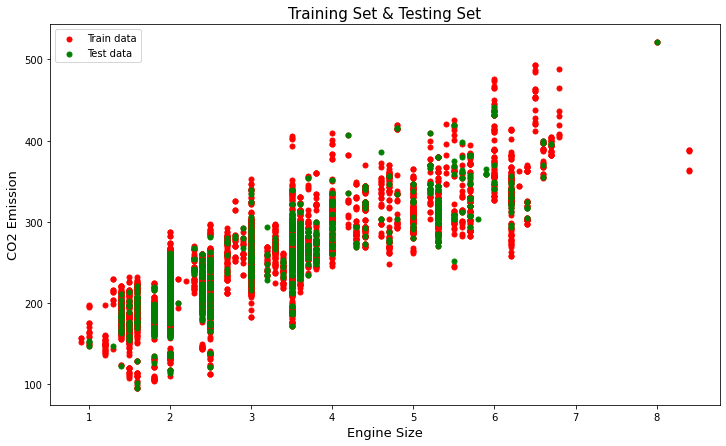

In [19]:
plt.figure(figsize=(12, 7))
plt.title('Training Set & Testing Set', fontsize=15)
plt.scatter(X_train, y_train, s=25, color='red', label='Train data')
plt.scatter(X_test, y_test, s=25, color='green', label='Test data')
plt.xlabel('Engine Size', fontsize=13)
plt.ylabel('CO2 Emission', fontsize=13)
plt.legend()
plt.show()

## _Modeling & Fitting_

In [20]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Coefficient & Intercept 
print(f'Coefficient: {regr.coef_[0]}')
print(f'Intercept: {regr.intercept_}')

Coefficient: 36.742678637965476
Intercept: 134.35895257560387


_The equation for this model is **y = 36.74 x + 134.36**_

### _Plotting Regression Line_

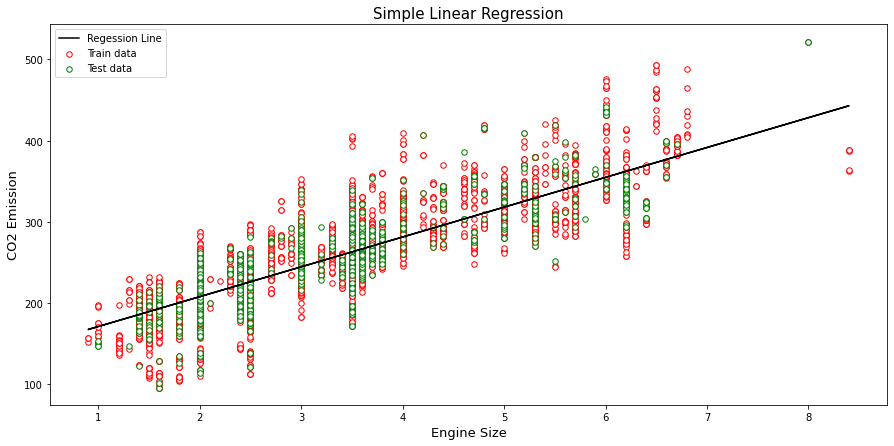

In [22]:
plt.figure(figsize=(15, 7))
plt.title('Simple Linear Regression', fontsize=15)
plt.scatter(X_train, y_train, s=30, color='white', edgecolor='red', label='Train data')
plt.scatter(X_test, y_test, s=30, color='white', edgecolor='green', label='Test data')
plt.plot(X, regr.coef_*X + regr.intercept_, '-k', label='Regession Line')
plt.xlabel('Engine Size', fontsize=13)
plt.ylabel('CO2 Emission', fontsize=13)
plt.legend()
plt.show()

### _Making Predictions_

In [23]:
y_pred = regr.predict(X_test).astype(int)
pred = pd.DataFrame({'Engine Size': X_test[:, 0], 'Actual CO2': y_test, 'Predicted CO2': y_pred})
pred

,Engine Size,Actual CO2,Predicted CO2
0,3.0,241,244
1,2.0,229,207
2,3.8,253,273
3,2.5,183,226
4,3.0,231,244
...,...,...,...
734,1.8,193,200
735,2.0,216,207
736,2.5,239,226
737,5.5,375,336


In [24]:
# Predicting CO2 Emission for Engine Size 9.3
print(f'Engine Size: 9.3\nCO2 Emission: {int(regr.predict([[9.3]])[0])}')

Engine Size: 9.3
CO2 Emission: 476


## _Model Evaluation_

In [25]:
# Calculating Error
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error(MAE): 23.299052774018943


---
## _Thank You!_